# Marta Kasica-Soltan - - - Workshop 3

### 1. a) Representation of Environment Using Python

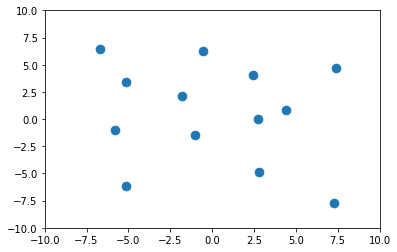

In [2]:
import matplotlib.pyplot as plt

# Report says to only use circles to depict obstacles

x = [-5.125, -6.7, -1.775, -0.525, 2.425, 7.425, 4.4, 2.725, -1.025, -5.8, -5.15, 2.825, 7.275]
y = [3.4250, 6.4, 2.1, 6.3, 4.075, 4.725, 0.875, 0, -1.5, -0.975, -6.2, -4.85, -7.75]

# Circles have a diameter of 1

plt.scatter(x, y, s = 75)
plt.axis([-10, 10, -10, 10])
plt.show()

## Potential Functions

In [3]:
# Vector Field Functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal


def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 


def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy


def plot_vector_field(ax=plt, fmax = 1): # I changed the max force to 0.5 so that it could plot higher forces, 
                                           # it would need since this is a larger scale
    X, Y = np.meshgrid(np.arange(-10, 10, 0.5), np.arange(-10, 10, 0.5)) # Made meshgrid larger, plot every 0.5

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')
    
    
def simulate(q, goal, obstacles, num_steps=1000, delta_time=0.5):
    trajectory = []
    for i in range(num_steps):
        # q0 x q1 y
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

# Robot Functions
class robot():
    
    def __init__(self, motor_names, frame_name=None):        
        self.client_id = self.open_connection()
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  None
        if frame_name is not None:
            self.frame = self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        self.client_id = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            

### 1. b) Representation of Vector Field

Populating the interactive namespace from numpy and matplotlib


<ipython-input-89-5fbc5945eed1>:12: RuntimeWarning: invalid value encountered in true_divide
  Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
<ipython-input-89-5fbc5945eed1>:13: RuntimeWarning: invalid value encountered in true_divide
  Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3


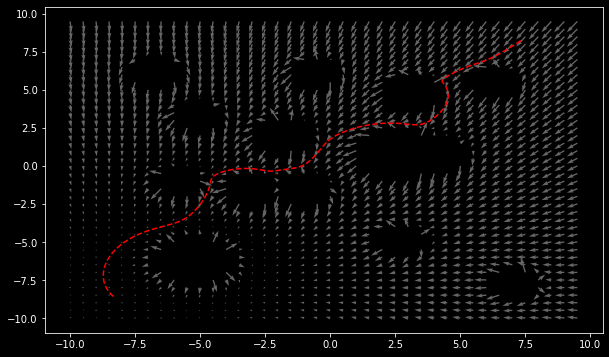

In [104]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Goal
goal = [-7.425, -7.925, 0.04]

# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[-5.8, -0.9750, 0.5],#c11   
             [-6.7, 6.4, 0.5], # rect4
             [-1.775, 2.1, 1],#c10
             [-0.525, 6.3, 0.5], #c8
             [3.3, 5, 1],#c5
             [6.425, 5.725, 0.5], # rect1
             [4.4, 0.875, 0.5], #c6
             [2.725, 1, 3],     # rect0
             [-1.025, -1.5, 0.8], # rect3
             [-3, -1.5, 0.8],
             [-5.125, 3.425, 0.5],#c9
             [-5.15, -6.2, 2.5],  # rect6
             [2.825, -4.85, 0.5],#c7
             [7.275, -7.75, 0.5],#c12
             ]

# Initial location of the robot
q = np.array((7.625, 8.55))

# Show result
trajectory = simulate(q, goal, obstacles)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot_vector_field()

In [7]:
import sim
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
# Check if connecting to Coppelia
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

if clientID != -1:
    print('Connected')

    # Now try to retrieve data in a blocking fashion (i.e. a service call):
    res, objs = sim.simxGetObjects(clientID, sim.sim_handle_all, sim.simx_opmode_blocking)

    print('Simulation time in milliseconds: ', sim.simxGetLastCmdTime(clientID))
    
    # Get Object position
    name = 'Omnirob'
    err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)        
    print('Omnirob is at [x,y,z]=', position)
    
    # Now close the connection to CoppeliaSim:
    sim.simxGetPingTime(clientID)
    sim.simxFinish(clientID)
    print('Disconnected')
else:
    print('Failed connecting to remote API server')

Connected
Simulation time in milliseconds:  8000
Omnirob is at [x,y,z]= [7.624996185302734, 8.549293518066406, 0.3544992208480835]
Disconnected


In [ ]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

# Continue with giving the robot instructions on where to move

motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot(motor_names)  # Create an instance of our robot
name = 'Omnirob'
err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)

while True:
    if r.client_id == -1:  # Check connection
        print('Robot is not connected')
        break
    res, position = sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)  
    vx, vy = total_force(position[0], position[1], goal, obstacles)
    r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
    time.sleep(0.1)

r.send_motor_velocities([0, 0, 0, 0])

r.close_connection()  # End

Robot connected


### 2. Implementation of Breadth-First in Coppelia

In [135]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot(motor_names)  # Create an instance of our robot

time_steps = linspace(0, 100, 1000, endpoint = False)
name = 'Omnirob'
err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
phase = 0

for t in time_steps:
    if r.client_id == -1:  # Check connection
        print('Robot is not connected')
        break
    # turn to the left
    elif phase < 2: 
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] > -1.36:
            r.send_motor_velocities([1.00, 1.00, 1.00, 1.00])
            phase = 1
        else:
            phase = 2
    # move to x = 5.5
    elif phase < 3:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][0] > 5.5:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 2
        else:
            phase = 3
    # turn (SWW)
    elif phase < 4:
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] < -1.25:
            r.send_motor_velocities([-1.00, -1.00, -1.00, -1.00])
            phase = 3
        else:
            phase = 4
    # long span across the map (like in the graph)
    elif phase < 5:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][0] > -8:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 4
        else:
            phase = 5
    # turn pointing down
    elif phase < 6: 
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] < -0.2:
            r.send_motor_velocities([-1.00, -1.00, -1.00, -1.00])
            
            phase = 5
        else:
            phase = 6
    # hit the green ball
    elif phase < 7:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][1] > -8:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 6
        else:
            phase = 7
    else:
        r.send_motor_velocities([0., 0., 0., 0.])
    time.sleep(0.1)
    
r.send_motor_velocities([0, 0, 0, 0])

r.close_connection()  # End


Robot connected
-1.5589287281036377
-1.5076327323913574
-1.4249420166015625
-1.3418556451797485
-1.258565068244934
Connection closed


### 3. Implementation of A* Trajectory in Coppelia

In [154]:
sim.simxFinish(-1)  # Close opened connections
clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim

# Joint name in coppelia
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot(motor_names)  # Create an instance of our robot

time_steps = linspace(0, 100, 1000, endpoint = False)
name = 'Omnirob'
err_code, cuboid = sim.simxGetObjectHandle(clientID, name, sim.simx_opmode_blocking)
phase = 0

for t in time_steps:
    if r.client_id == -1:  # Check connection
        print('Robot is not connected')
        break
    # turn to the left
    elif phase < 2: 
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] > -0.7:
            r.send_motor_velocities([1.00, 1.00, 1.00, 1.00])
            phase = 1
        else:
            phase = 2
    # move to x = 3.5
    elif phase < 3:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][0] > 4:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 2
        else:
            phase = 3
    # turn completely to left
    elif phase < 4:
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] > -1.36:
            r.send_motor_velocities([1.00, 1.00, 1.00, 1.00])
            phase = 3
        else:
            phase = 4
    # go to x = 1.7
    elif phase < 5:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][0] > 1.7:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 4
        else:
            phase = 5
    # turn pointing SW
    elif phase < 6: 
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] < -0.9:
            r.send_motor_velocities([-1.00, -1.00, -1.00, -1.00])
            phase = 5
        else:
            phase = 6
    # move till x is zero
    elif phase < 7:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][0] > 0:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 6
        else:
            phase = 7
    # turn down
    elif phase < 8:
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] < -0.2:
            r.send_motor_velocities([-1.00, -1.00, -1.00, -1.00])
            phase = 7
        else:
            phase = 8
    # go to y = 1.4
    elif phase < 9:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][1] > 1.4:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 8
        else:
            phase = 9
    # turn SSW
    elif phase < 10: 
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] > -1.25:
            r.send_motor_velocities([1.00, 1.00, 1.00, 1.00])
            phase = 9
        else:
            phase = 10
    # go until x = -8
    elif phase < 11:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][0] > -8:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 10
        else:
            phase = 11
    # turn down
    elif phase < 12:
        if sim.simxGetObjectOrientation(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][2] < -0.2:
            r.send_motor_velocities([-1.00, -1.00, -1.00, -1.00])
            phase = 11
        else:
            phase = 12
    # hit the green ball
    elif phase < 13:
        if sim.simxGetObjectPosition(clientID, cuboid, -1, sim.simx_opmode_blocking)[1][1] > -8:
            vx, vy = 5.00, 0
            r.send_motor_velocities([vx - vy, -vx - vy, -vx + vy, vx + vy])
            phase = 12
        else:
            phase = 13
    else:
        r.send_motor_velocities([0., 0., 0., 0.])
    time.sleep(0.1)
    
r.send_motor_velocities([0, 0, 0, 0])

r.close_connection()  # End


Robot connected


KeyboardInterrupt: 